In [1]:
#%% Import libraries
import os
from data_extraction_functions import create_brain_mask, get_mask, clean_func_image, extract_samples, extract_samples_with_atlas, convert_samples_to_features

#%% Define paths
data_root = '/Volumes/T7/BIDS-BRAINPLAYBACK-TASK2'
fmriprep_dir = os.path.join(data_root, 'derivatives','fmriprep23')
output_func_dir = os.path.join(data_root, 'derivatives', 'mvpa_04_musicnoise_bold', 'func_clean')
output_feat_dir = os.path.join(data_root, 'derivatives', 'mvpa_04_musicnoise_bold', 'features')

In [2]:
subject = '01'
run = '1'

In [3]:
#%% Iterate on the subjects and runs
img_mask = get_mask(data_root)

Loading brain mask...
Brain mask loaded.


/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/core/fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)
/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/nilearn/image/resampling.py:756: UserWarning: Casting data from int32 to float32
  return resample_img(
/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/nilearn/image/resampling.py:293: UserWarning: Resampling binary images with continuous or linear interpolation. This might lead to unexpected results. You might consider using nearest interpolation instead.
  warnings.warn(



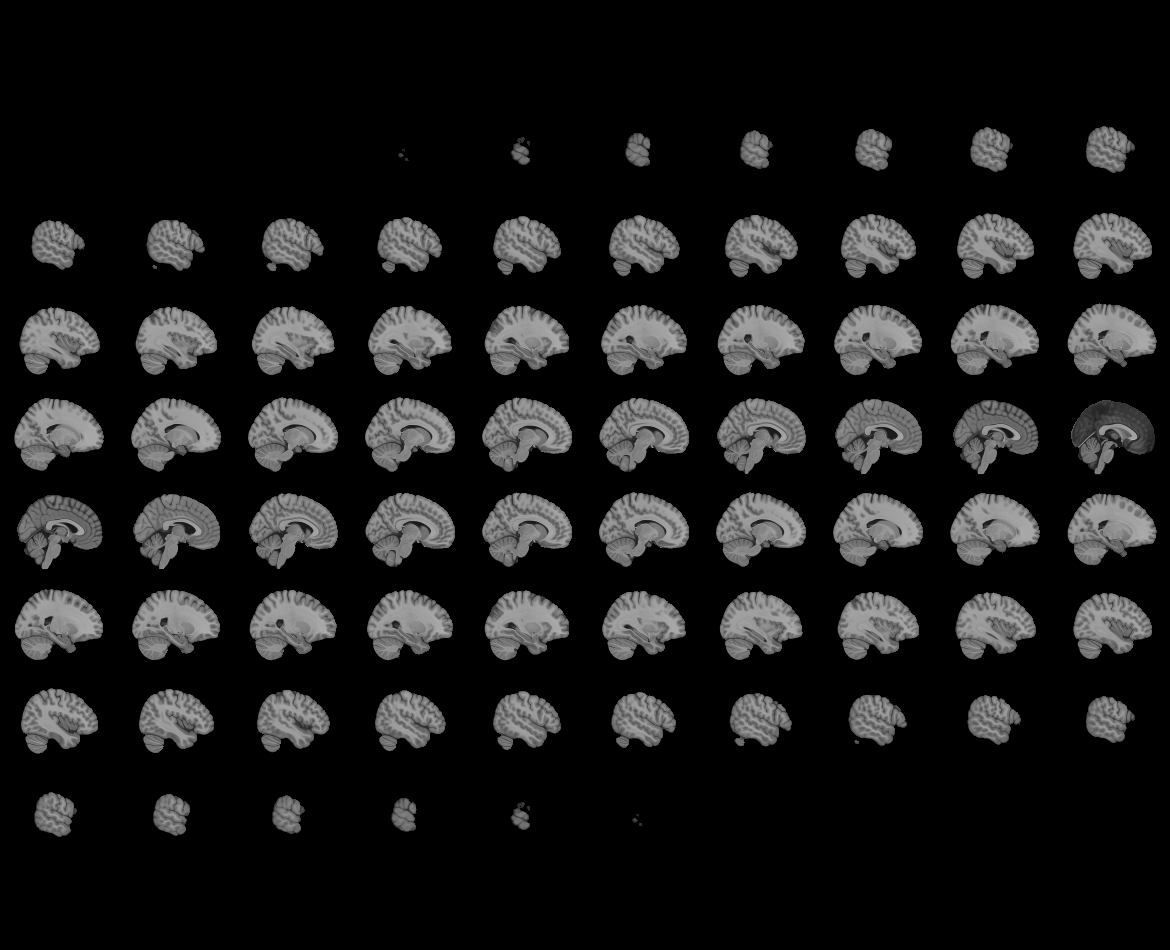
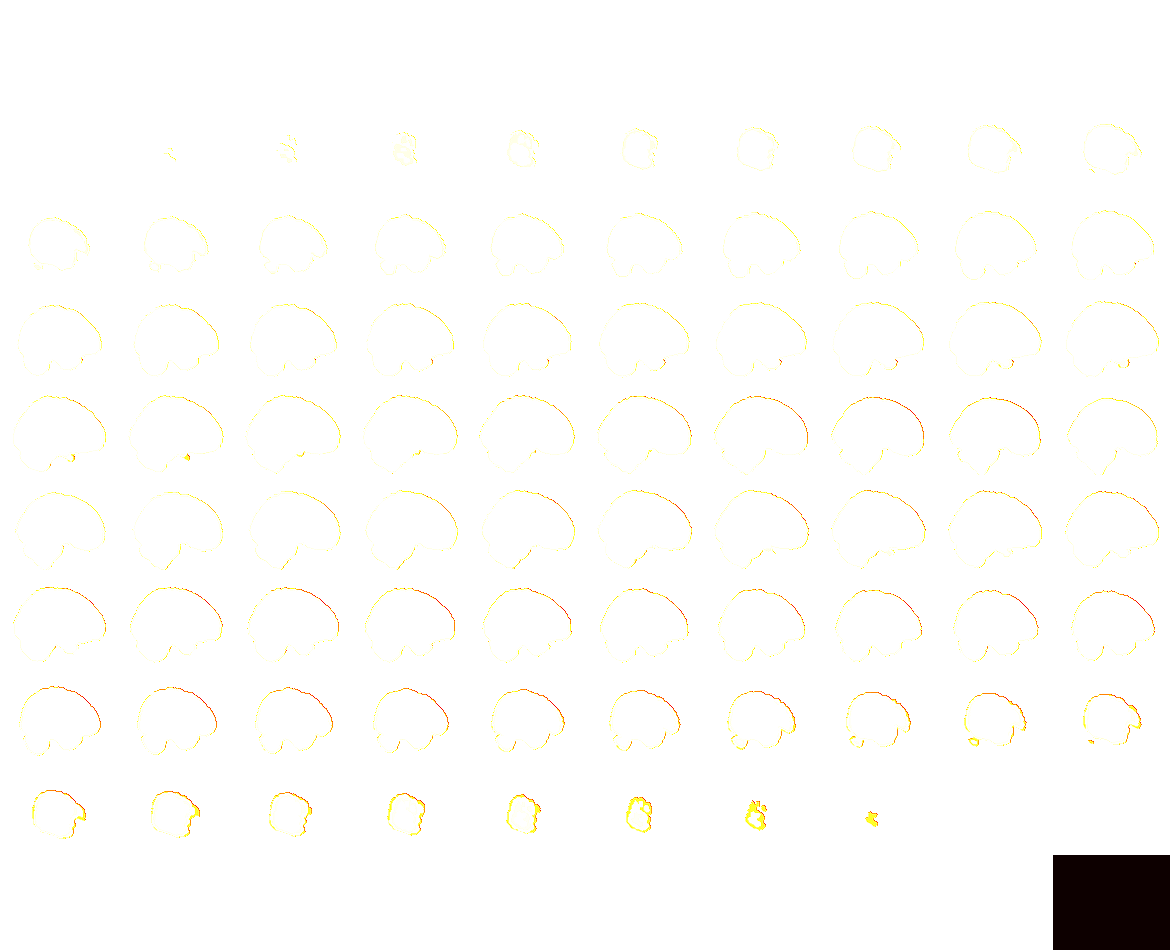

In [4]:
from nilearn import plotting
plotting.view_img(img_mask)

In [5]:
img_crop = clean_func_image(fmriprep_dir, output_func_dir, img_mask, subject, run, overwrite=False)

Functional image already cleaned for subject 01, run 1.


In [6]:
img_crop.shape

(97, 115, 97, 660)

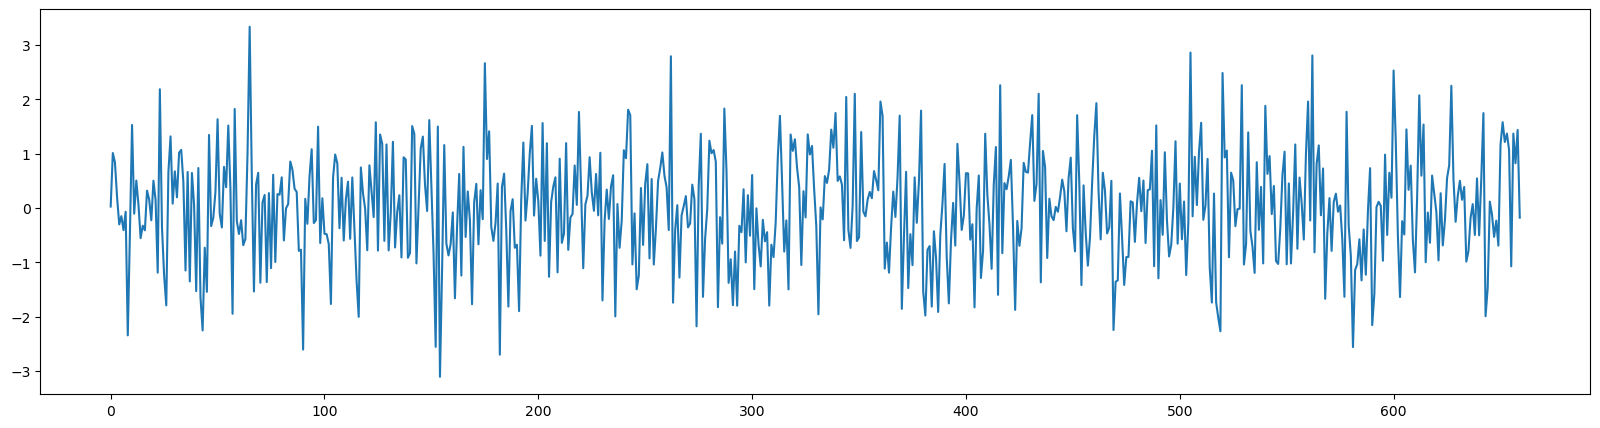

In [7]:
from matplotlib import pyplot as plt

plt.figure(figsize=(20,5))
plt.plot(img_crop.get_fdata()[30,30,30,...])

In [8]:
#samples = extract_samples(img_crop, img_mask, subject, run)
samples = extract_samples_with_atlas(img_crop, 'koelsch_spheres_per_voxel', subject, run)


Extracting samples from atlas koelsch_spheres_per_voxel for subject 01, run 1...


/var/folders/nd/bgqkn02j7sl982jdtqhts9z00000gn/T/ipykernel_73448/125030566.py:2: DeprecationWarning: The current default behavior for the "two_sided" argument is  "True". This behavior will be changed to "False" in version 0.13.
  samples = extract_samples_with_atlas(img_crop, 'koelsch_spheres_per_voxel', subject, run)
/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/nilearn/image/image.py:1106: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  return new_img_like(niimg, result, niimg.affine)


Samples extracted for subject 01, run 1.


In [10]:
samples.shape

(660, 2671)

In [9]:
convert_samples_to_features(samples, data_root, output_feat_dir, subject, run)

Converting samples to features for subject 01, run 1...
Editing events for subject 01, run 1...
Events edited for subject 01, run 1.
Features extracted and labels saved for subject 01, run 1.
